In [ ]:
import numpy as np
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
import tqdm
from tqdm import tqdm
import random
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2D Ackley Function

In [ ]:
def ackley_2d(x, y):
    # the formula is rather large
    out = (-20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) 
           - np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
           + np.e + 20)
    
    # returning
    return -out

In [ ]:
r_min, r_max = -4.0, 4.0
# sample input range uniformly
x_axis = np.arange(r_min,r_max,0.16)
y_axis = np.arange(r_min,r_max,0.16)
#create meshgrid
x,y = np.meshgrid(x_axis,y_axis)
target = ackley_2d(x,y)
# create a surface plot with the jet color scheme
figure = plt.figure()

    
# plt.figure(figsize=(7,7))
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
figure.set_size_inches(10, 7)
axis = figure.gca(projection='3d')
axis.set_xlabel('x', fontsize=15)
axis.set_ylabel('y',fontsize=15)
axis.set_zlabel('f(x,y)',fontsize=15, rotation = 90)
axis.plot_surface(x, y, target, cmap='jet',)
# show the plot
plt.show()

## Grid Search

In [ ]:
def grid_search(seed,x_axis, y_axis, num_iter):
  grid_dict = []
  result = []
  np.random.seed(seed)
  while len(grid_dict) != num_iter:
    x = np.random.choice(x_axis, replace=True)
    y = np.random.choice(y_axis, replace=True)

    if (x,y) not in grid_dict:
      grid_dict.append((x,y))
  # print(grid_dict)
  x_list = [x[0] for x in grid_dict]
  y_list = [x[1] for x in grid_dict]
  for x in grid_dict:
    result.append(ackley_2d(x[0],x[1]))
  # x_grid, y_grid = meshgrid(x_list, y_list)
  # result = ackley_2d(x_grid, y_grid)
  return result


In [ ]:
simulation = 20
num_iter = 200
seed = 100
grid_result = np.zeros((num_iter))
for _ in range(simulation):
  seed = seed*2
  grid_result = np.add(grid_result,grid_search(seed, x_axis,y_axis,num_iter)) 

grid_result = np.divide(grid_result,simulation)
# print(grid_result)
x = np.arange(1, num_iter+1)
y = grid_result
print(y)
y_max = -9999
track_y_max = []
for i in range(len(y)):
  if y[i] > y_max:
    y_max = y[i]
    
  track_y_max.append(y_max)


plt.plot(x,track_y_max)
plt.show()

## plot 3D


"""
a = [1,2,3]
b = [2,3,4]
a,b = np.meshgrid(a,b)
out = a**2 + b**2
row:x
column:y
# array([[ 5,  8, 13],
#        [10, 13, 18],
#        [17, 20, 25]])

"""

## Bayesian Optimization

### Thompson Sampling Gaussian Process

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import UtilityFunction
from bayes_opt import  BayesianOptimization

num_sim = 20
iter_bo = 200
domain = [{'name': 'x_observed', 'type': 'continuous', 'domain': (-4,4)},
          {'name': 'y_observed', 'type': 'continuous', 'domain': (-4,4)}]

optimizer = BayesianOptimization(f=ackley_2d,pbounds={'x':(-4,4),'y':(-4,4)},
                                 verbose = 2,
                                 random_state=1,)

utility = UtilityFunction(kind="ucb",kappa=2.5,xi=0.0)
next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)

target = ackley_2d(**next_point_to_probe)
print("Found the target value to be:", target)

optimizer.register(params=next_point_to_probe,target=target)
bayes_result = np.zeros(200)

for _ in tqdm(range(num_sim)):
  z = []
  for _ in range(iter_bo):
      next_point = optimizer.suggest(utility)
      target = ackley_2d(**next_point)
      z.append(target)
      # print("Found the target value to be:", target)
      optimizer.register(params=next_point,target=target)
      # print(optimizer.max)
  bayes_result = np.add(bayes_result,z) 

bayes_result = np.divide(bayes_result,num_sim)

y_opt_max = -9999
track_y_opt_max = []
for i in range(len(bayes_result)):
  if bayes_result[i] > y_opt_max:
    y_opt_max = bayes_result[i]
    
  track_y_opt_max.append(y_opt_max)

 
      # print(next_point,target)



Next point to probe is: {'x': -0.663823962379408, 'y': 1.7625959475372648}
Found the target value to be: -6.5910368714698535


100%|██████████| 1/1 [01:42<00:00, 102.30s/it]


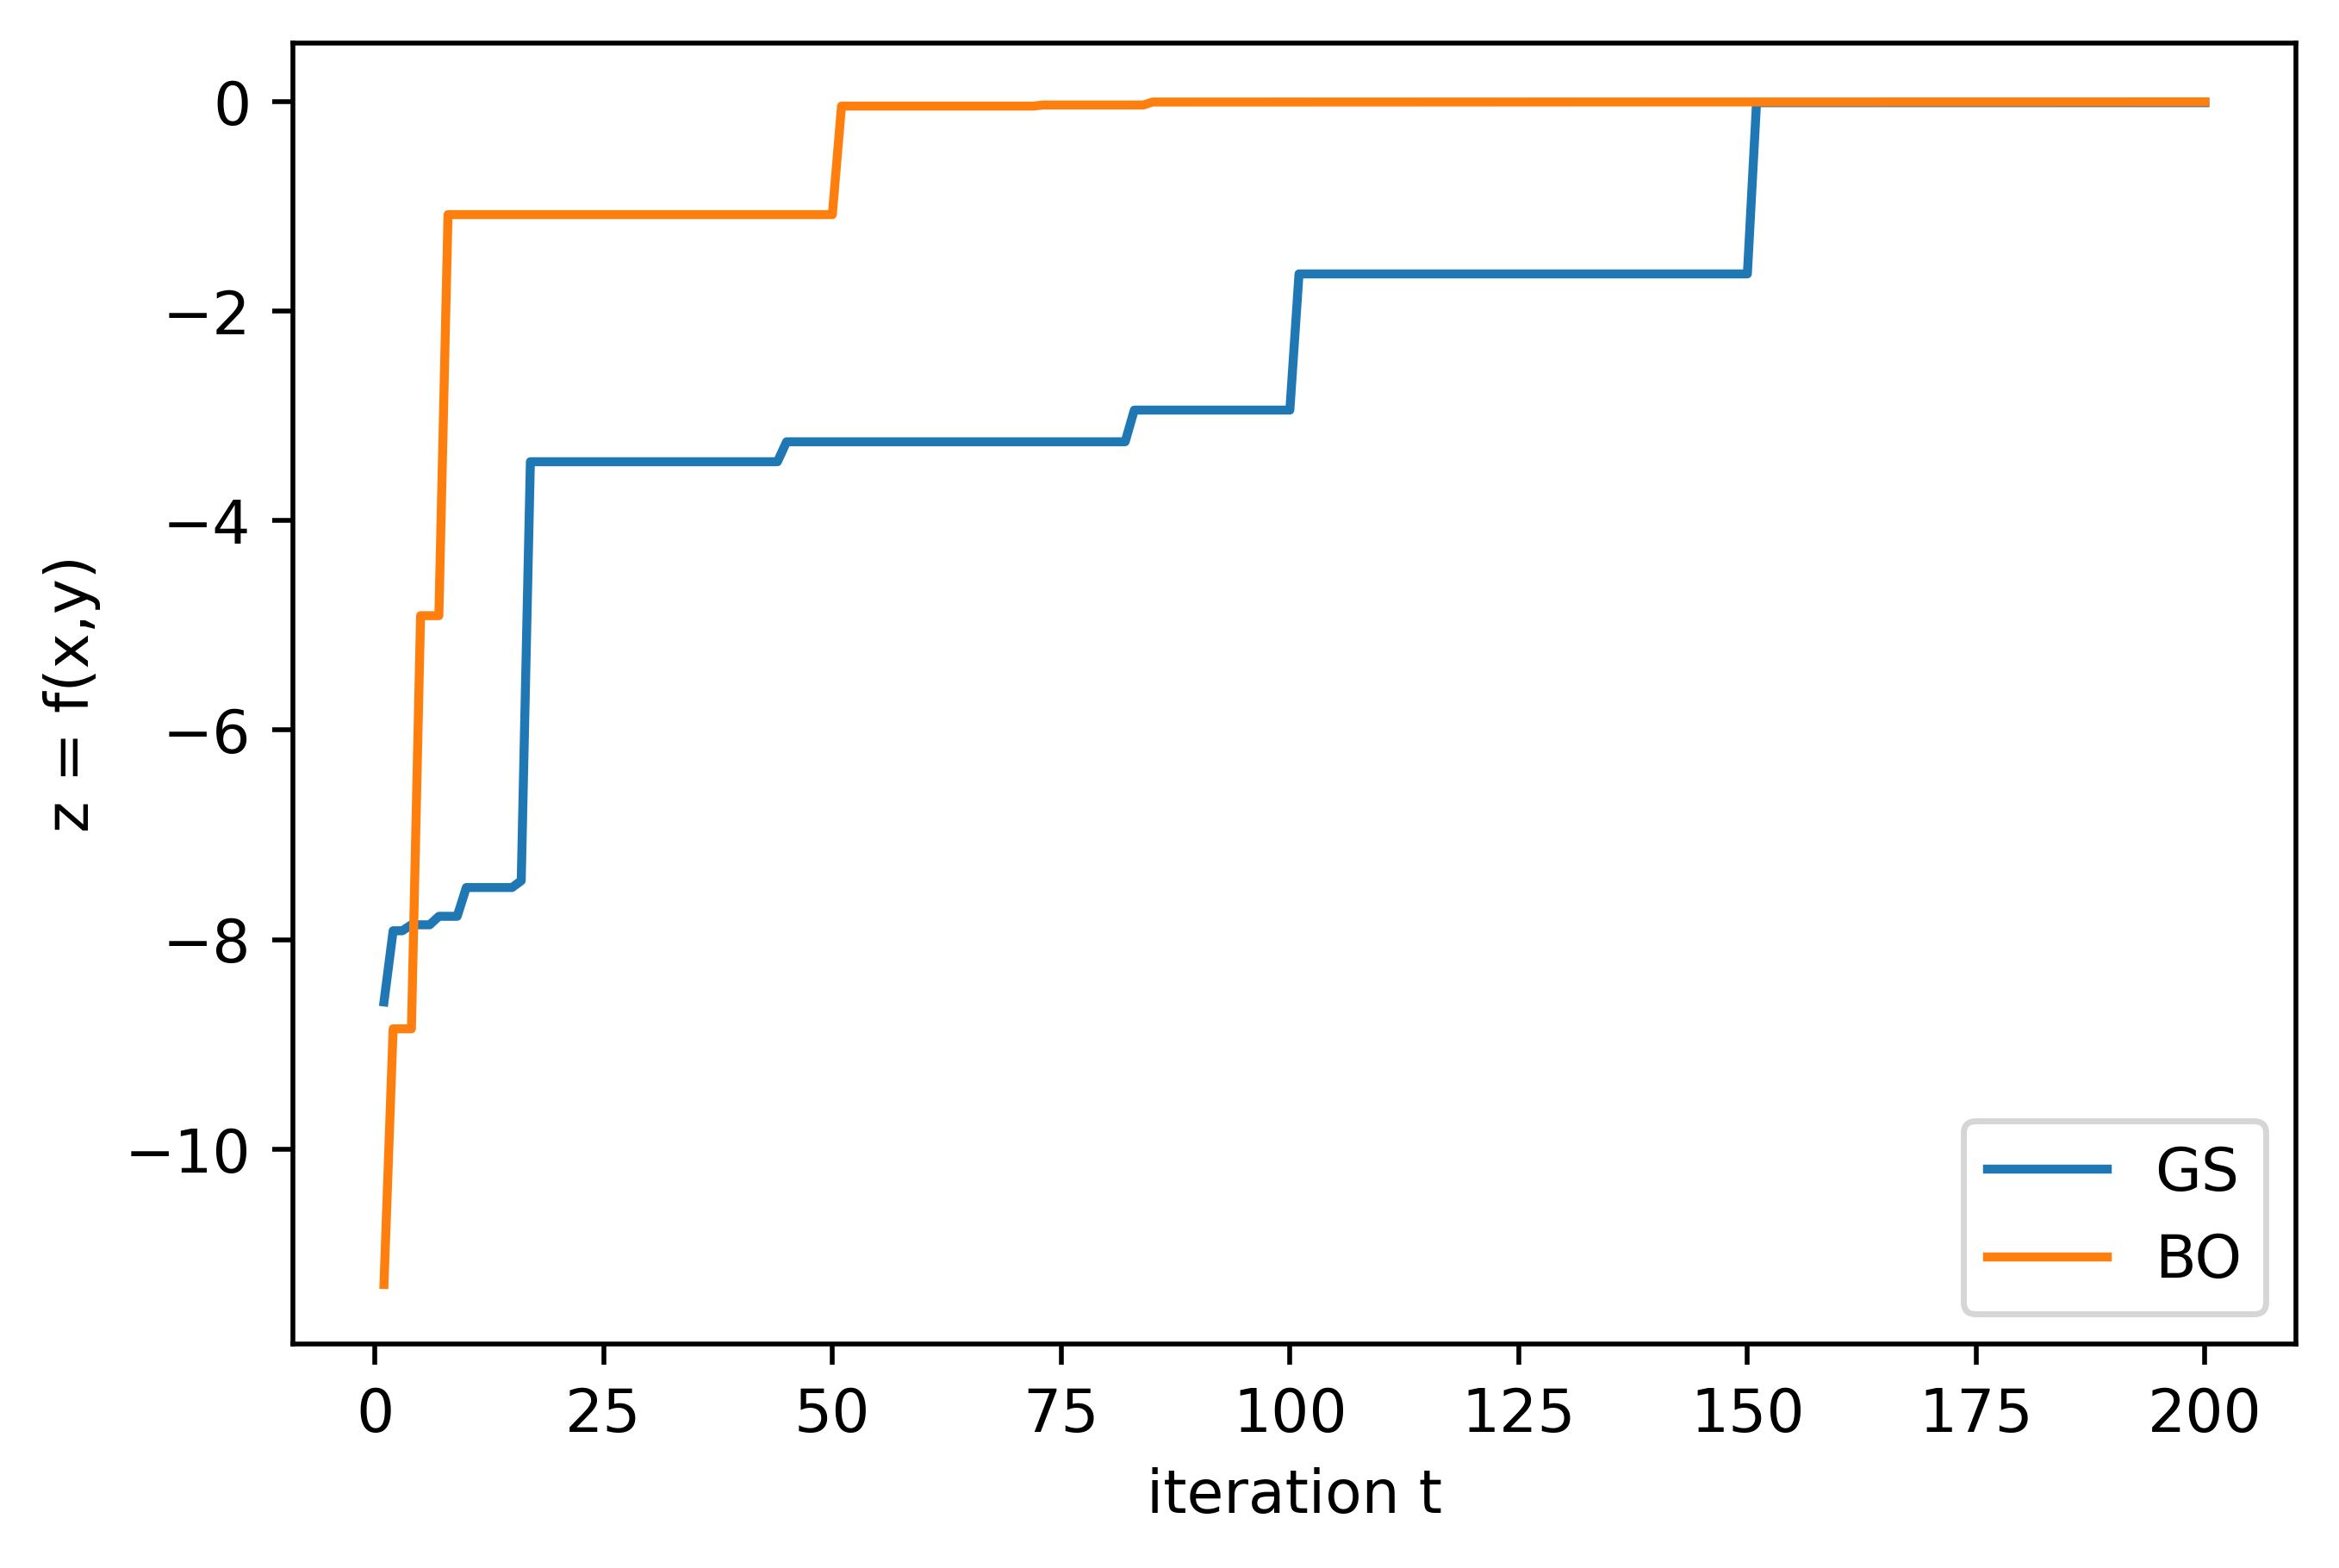

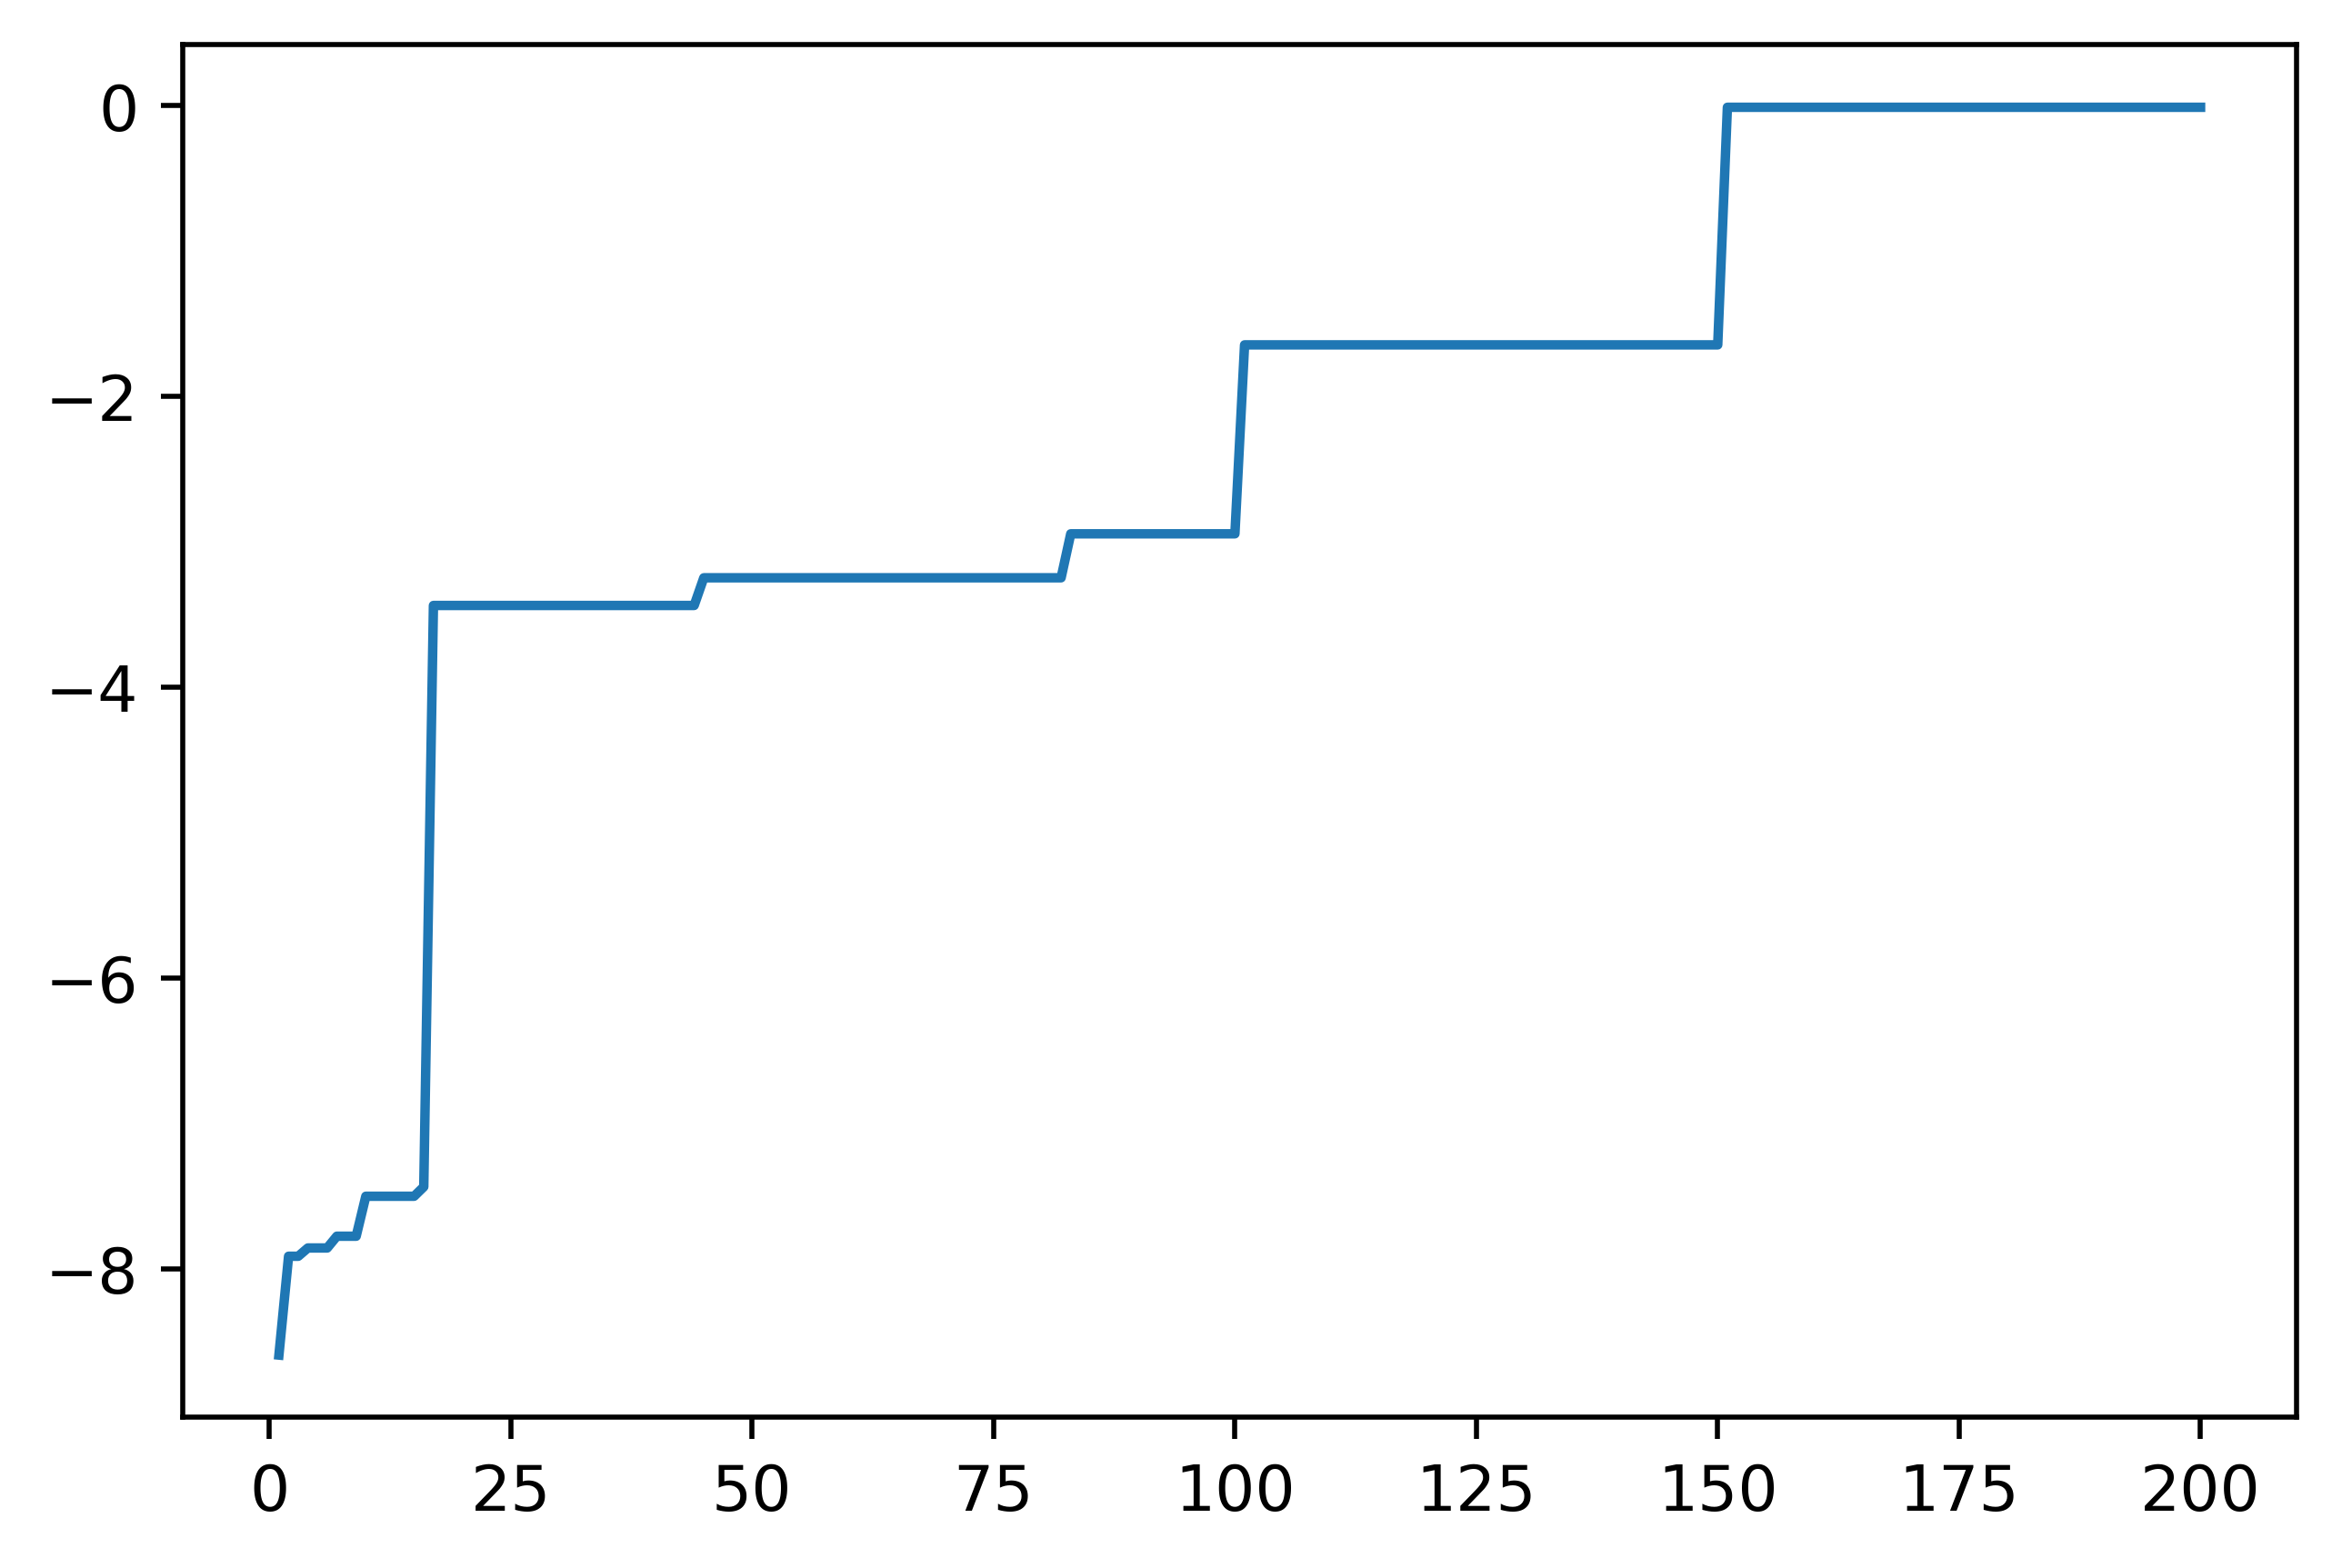

In [ ]:
x = np.arange(1, 201)
y = track_y_max
y2 = track_y_opt_max
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='GS')
ax.plot(x, y2, label='BO')
ax.set_xlabel('iteration t')
ax.set_ylabel('z = f(x,y)')
ax.legend()
plt.show()
plt.plot(x,y)
plt.show()